Exam number: B222908 
Cooperator: B214618

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys,string
%matplotlib inline

## 1. Probability

In [2]:
# load data
# convert arry into string using 'str()'
dna1= str(np.load('data/dna1.npy'))
dna2= str(np.load('data/dna2.npy'))
# make content into uppercase and delete empty rows
dna1=dna1.upper().replace('\n','')
dna2=dna2.upper().replace('\n','')
# check data content
print('dna1',dna1[0:10]+'...'+dna1[-10:],len(dna1),
      '\ndna2',dna2[0:10]+'...'+dna2[-10:],len(dna2))

dna1 TAGCAGAAGT...AAATGAAATA 8000 
dna2 TTATTGTGAT...CAATATCAAT 8000


### Question 1.1: 
We would like to estimate the probability of each nucleotide in each DNA sequence.Write some code that uses a for loop to systematically go through a sequence, extracts a segment (a slice in Python jargon) of the sequence (here the segment is just one letter, but we will consider longer segments later), and then checks if, say, "A" is in the segment. By recording the number of successful checks, you can count the total number of "A" nucleotides and so estimate the probability of a nucleotide in the sequence being an "A" nucleotide.<br>
Check your result using the count method available for all strings.<br>
Repeat this estimation of the probability for the other nucleotides and for both DNA sequences. Print the results. [5]

In [3]:
# a function to calculate the probability of each base
def base_prob(dna,base,decimal=3):
    dna=dna.upper().strip().replace('\n','')
    base_count=0
    for i in range(len(dna)):
        if dna[i] == base:
            base_count+=1
    prob=round(base_count/len(dna),decimal) # round the value
    print(f'There are {base_count} {base} bases in the sequence, probability is {prob}.')
    return prob

# run function for base A, keep 3 decimals
A1=base_prob(dna1,'A',3)
A2=base_prob(dna2,'A',3)
# check result using count method
if A1==round(dna1.count('A')/len(dna1),3) and A2==round(dna2.count('A')/len(dna2),3):
    print('Checked! Results are correct!')

There are 2465 A bases in the sequence, probability is 0.308.
There are 2470 A bases in the sequence, probability is 0.309.
Checked! Results are correct!


In [4]:
# Repeat this estimation of the probability for the other nucleotides
checks,probs=[],{} # 'checks' is a list, 'probs' is a dictionary
seq_number=1
for dna in [dna1,dna2]:
    print('For dna'+str(seq_number)+':')
    for base in ['A','C','T','G']:
        # store the probability results
        probs['dna'+str(seq_number)+'_'+base]=base_prob(dna,base,3) 
        # check the result using 'count' method
        if probs['dna'+str(seq_number)+'_'+base]==round(dna.count(base)/len(dna),3):
            checks.append(True) # record the comparison results
    seq_number+=1 # goes to second sequence
if False in checks:
    print('Oh no! The function has something wrong!')
else:
    print('Checked! All correct!')
    

For dna1:
There are 2465 A bases in the sequence, probability is 0.308.
There are 1789 C bases in the sequence, probability is 0.224.
There are 2394 T bases in the sequence, probability is 0.299.
There are 1352 G bases in the sequence, probability is 0.169.
For dna2:
There are 2470 A bases in the sequence, probability is 0.309.
There are 1736 C bases in the sequence, probability is 0.217.
There are 2484 T bases in the sequence, probability is 0.31.
There are 1310 G bases in the sequence, probability is 0.164.
Checked! All correct!


#### Answer: 
For both sequences, 'A' has the highest probability(about 0.3), and 'G' has the lowest probability(about 0.16). There's no significant difference based on the fequencies of the bases between these two sequences.

### Question 1.2 
One of the sequences is from the yeast genome and one is synthetic and generated assuming each letter in the sequence is independent of the previous letters. Adapt your code to extract segments of four letters and calculate the probability of finding "TTTT" in each sequence. Note that "TTTTT" has two counts of "TTTT". Refreshing the meaning of independence in probability theory and, considering the probability of occurrence of "TTTT", which sequence is real and which synthetic? Explain your reasoning. [6]

In [5]:
# a function to calculate the probability of kmer
def seg_prob(dna,kmer,decimal=5):
    dna=dna.upper().strip().replace('\n','')
    kmer_counts=0
    total_kmers=len(dna)-len(kmer)+1
    # if no kmer in the dna, just quickly stop the function
    if kmer not in dna:
        print(f'no {kmer} in the sequence!')
        return 0
    # count the number of the kmer
    for i in range(total_kmers):
        if dna[i:i+len(kmer)]==kmer:
            kmer_counts+=1
    # calculate the probability of kmer
    prob=round(kmer_counts/total_kmers,decimal)
    print(f'There are {kmer_counts} {kmer} in the sequence, probability is {prob}.')
    return prob

# run the function
print('For dna1:')
tttt1=seg_prob(dna1,'TTTT')
print('For dna2:')
tttt2=seg_prob(dna2,'TTTT')

# check if the function can count the "TTTTT" as two "TTTT" by using count() method
Tcount_test1=round(dna1.count('TTTT')/len(dna1),5)
Tcount_test2=round(dna2.count('TTTT')/len(dna2),5)
if Tcount_test1<tttt1 and Tcount_test2<tttt2:
    print(f'\nFunction correct! Results from this function is bigger than the results from',
          f'the "count()" method ({Tcount_test1} and {Tcount_test2} respectively),',
          f'which means the function can count "TTTTT" as two "TTTT"s.')

For dna1:
There are 79 TTTT in the sequence, probability is 0.00988.
For dna2:
There are 222 TTTT in the sequence, probability is 0.02776.

Function correct! Results from this function is bigger than the results from the "count()" method (0.00662 and 0.0135 respectively), which means the function can count "TTTTT" as two "TTTT"s.


In [6]:
# the dictionary of single-base probabilities
for key, value in probs.items():
    print(f'{key}: {value}')
# method 1: compare the actual p("TTTT") and the expected probability E[p] calulated from p("T") 
expected_tttt1=round(probs['dna1_T']**4,5)
multi_1=round(tttt1/expected_tttt1,2)
expected_tttt2=round(probs['dna2_T']**4,5)
multi_2=round(tttt2/expected_tttt2,2)
# print the E[p] and comparison result of E[p] to real probability
print(f'\nIndependence in probability theory:\n',
      f'Expected probability of "TTTT" in dna1: E[p1]={expected_tttt1}.',
      f'Real p1 is {multi_1} times higher than E[p1].',
      f'\nExpected probability of "TTTT" in dna2: E[p2]={expected_tttt2}.',
      f'Real p2 is {multi_2} times higher than E[p2].')
# print the conclusion
if multi_1 > multi_2:
    print('dna1 is real, dna2 is synthetic.\n')
else:
    print('dna2 is real, dna1 is synthetic.\n')

# method 2: binomial test, the probability of getting the number of 'TTTT' under the null hypothesis
from scipy.stats import binom_test
pbinom1=binom_test(x=79, n=len(dna1)-3, p=probs['dna1_T']**4, alternative='greater')
pbinom2=binom_test(x=222, n=len(dna2)-3, p=probs['dna2_T']**4, alternative='greater')
# print out the p values in scientific notation
print('Binomial test under null hypothesis:\nFor dna1: p_value={:.2e} \n'.format(pbinom1),
      'For dna2: p_value={:.2e}'.format(pbinom2))
# print the conclusion
if pbinom1 < pbinom2 < 0.05:
    print('dna1 is real, dna2 is synthetic.\n')
elif pbinom2 < pbinom1 < 0.05:
    print('dna2 is real, dna1 is synthetic.\n')

dna1_A: 0.308
dna1_C: 0.224
dna1_T: 0.299
dna1_G: 0.169
dna2_A: 0.309
dna2_C: 0.217
dna2_T: 0.31
dna2_G: 0.164

Independence in probability theory:
 Expected probability of "TTTT" in dna1: E[p1]=0.00799. Real p1 is 1.24 times higher than E[p1]. 
Expected probability of "TTTT" in dna2: E[p2]=0.00924. Real p2 is 3.0 times higher than E[p2].
dna2 is real, dna1 is synthetic.

Binomial test under null hypothesis:
For dna1: p_value=3.69e-02 
 For dna2: p_value=1.68e-44
dna2 is real, dna1 is synthetic.



#### Answer: 
Given the results by methods of probability comparison and binomial test, it shows that the dna1 sequence is more likely to be sythetic, and dna2 sequence is more likely to be real. <br>
In dna2, the real probability of "TTTT" is 3 times higher that the expected value, while the probability in dna1 is very close to the expected value. It means that this large amount of 'TTTT's in dna2 is less likely be randomly generized, indicating the dna2 sequence is more likely to be real. <br>
Result from binomial test also shows geting 222 "TTTT"s in dna2 is significantly larger than the expected number of "TTTT"s under null hypothesis. So if there's only one of the two sequences is real, then it must be the dna2 sequence.

### Question 2.1: 
Write a script or a function in Python to calculate the entropy of a random variable given its probability distribution [2].

In [7]:
X=[0.25,0.25,0.3,0.2] # a test variable
# a function for calculating entropy H(X)
def H(X=1):
    entro=0
    for i in range(len(X)):
        # check if the value equals 0
        if X[i]>0:
            entro=entro-X[i]*np.log2(X[i])
    return entro

# Test function
print(f' The entropy of variable X={X} is {round(H(X),3)}')

 The entropy of variable X=[0.25, 0.25, 0.3, 0.2] is 1.985


### Question 2.2: 
In the file annualprobs.npy, six probability distributions are defined as an array of arrays. Load these distributions using **d= np.load('annualprobs.npy')** and type **d.shape** to see how the data is structured.<br>
Each distribution represents the probability of an event occurring for each month of the year (and so has 12 numbers). The first element of the array, d[0], gives the first probability distribution of the event occurring, the second element of the array, d[1] gives the second probability distribution of the event, and so on.<br>
Use plt.bar to plot these distributions, label the x-axis with the first letters of the months of the year, and title each figure with the number of the distribution and its entropy in bits. [2]<br>
From what you have learned from your results, which type of probability distributions would you expect to have the highest entropy and which distributions to have the lowest entropy and why? [5]

In [8]:
# load data
d= np.load('data/annualprobs.npy')
# check data content
print(d.shape)
print(type(d))
print(d)

(6, 12)
<class 'numpy.ndarray'>
[[0.06010111 0.04130492 0.08731046 0.0765835  0.09525157 0.0562892
  0.08488968 0.08995465 0.07090427 0.14661349 0.09062795 0.10016919]
 [0.08705501 0.08180415 0.08610777 0.08791366 0.07949633 0.08401198
  0.07743163 0.08358469 0.07703957 0.07768619 0.08817854 0.08969049]
 [0.         0.         0.         0.         0.         0.6168885
  0.3831115  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.31543519 0.31649161
  0.23879741 0.12927579 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.08473688 0.13819307 0.16125715 0.08431425
  0.2320818  0.08162663 0.21779022 0.         0.         0.        ]]


In [9]:
# calculate entropy of each array
Hy={}
for i in range(d.shape[0]):
    Hy[i]=H(d[i])
#print the result in neat format
for key, value in Hy.items():
    print(f'Distribution {key+1}: entropy = {round(value,3)}')

Distribution 1: entropy = 3.519
Distribution 2: entropy = 3.583
Distribution 3: entropy = 0.96
Distribution 4: entropy = 1.925
Distribution 5: entropy = 0.0
Distribution 6: entropy = 2.685


<Figure size 640x480 with 0 Axes>

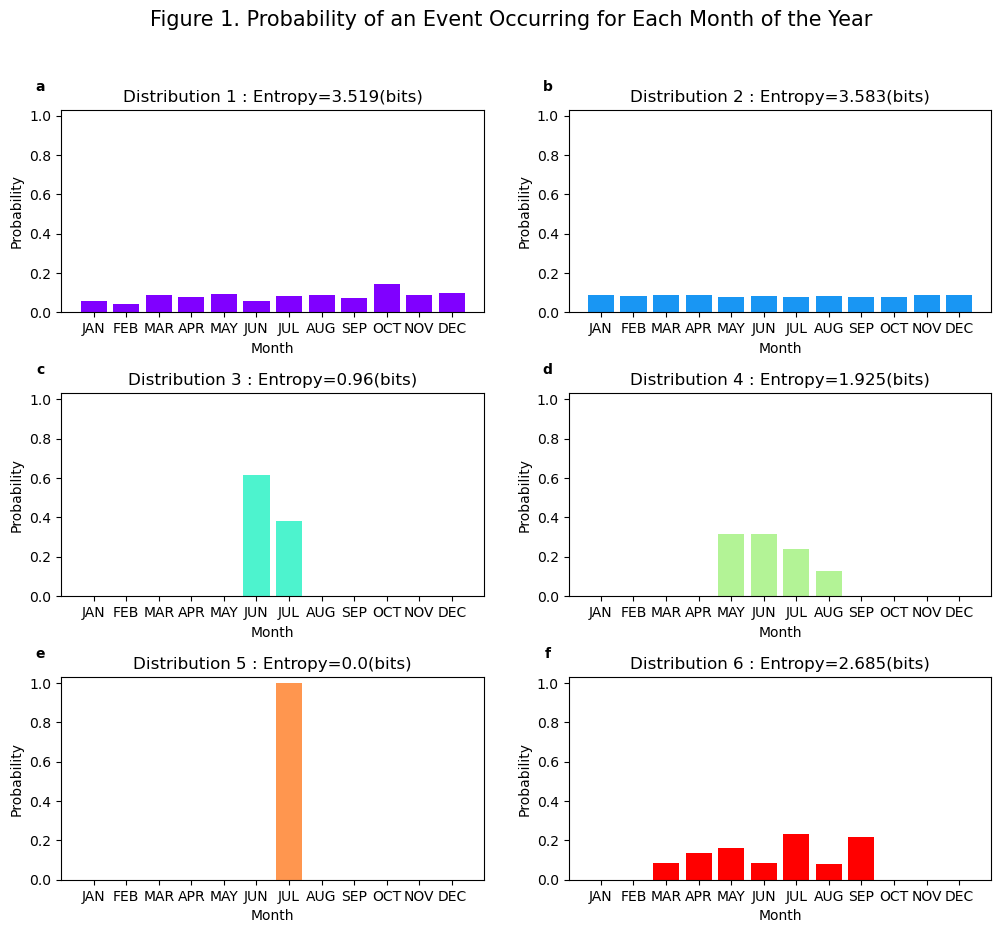

In [10]:
# plot the distributions
# create month labels
month=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
plt.figure()
# create 3*2 subplots
fig, axs = plt.subplots(3,2,figsize=(12,10))
# create list of different colors for different subplots
color=plt.cm.rainbow(np.linspace(0,1,6))
# create super title
fig.suptitle('Figure 1. Probability of an Event Occurring for Each Month of the Year',fontsize=15)
string.ascii_lowercase[0:6]
num=0
# flatten the axs
for i,subfig in enumerate(axs.flatten()):
        # bar plot
        subfig.bar(month,d[num],color=color[num])
        # subtitle for each subplot
        subfig.set_title(f'Distribution {num+1} : Entropy={round(Hy[num],3)}(bits)')
        # set the y scale as [0,1] for all subplots for better comparing each other
        subfig.set_ylim(0,1.03)
        # labels of x and y axises
        subfig.set_xlabel('Month')
        subfig.set_ylabel('Probability')
        # give a serial number to each subplot
        subfig.text(-0.05, 1.15, string.ascii_lowercase[i], transform=subfig.transAxes, 
                    fontweight='bold',horizontalalignment='center', verticalalignment='top')
        # record the number of distribution
        num+=1
#adjust the distance between subplots
plt.subplots_adjust(hspace=0.4)
# show plot
plt.show()

Fig.1 Probability distribution of 6 datasets(1a-1f). Entropy of each distribution is described on the subtile of each plot. Y axis is the probability of the event occurring in each month. X axis is the abbreviation of 12 months.

#### Answer:
The results show that the distribution 5 is single-value distributed (or deterministic distributed), and has the lowest entropy(0), meaning that the event certainly happens in July under distribution 5. <br>
The distribution 2 is uniformly distributed and has the highest entropy(3.583), which means the event happening in which months is unpredictable. The distribution 1 comes the second(entropy=3.519), which is also approximately follows the uniform distribution.<br>
From this result, we can draw a conclusion that uniformly distributed variable has highest entropy because it has great uncertainty.<br>
On the contrary, if a variable follows deterministic distribution, which means the variable equals to a certain value (X = E\[X\]), then its entropy = 0.

## 2. Measuring the dependence between two random variables

In [11]:
#load data
xy= np.load('data/xandy.npy')
#check content
print(xy.shape)
print(type(xy))
print(xy[0])

(8, 10000)
<class 'numpy.ndarray'>
[559.31299349 507.44063212 596.05952403 ... 531.48861237 525.03097371
 512.51860453]


### Question 3.1:
Write a general function to calculate the correlation coefficient between two arrays X and Y.

In [12]:
%time # show the time of running this cell. The function is efficient and fast
# a function to calculate correlation coefficient between two variables
def correla(x,y):
    Ex=np.mean(x)
    Ey=np.mean(y)
    # calculate the sum of each part in the formular using for loop
    up=0;do1=0;do2=0
    for i in range(len(x)):
        up+=(x[i]-Ex)*(y[i]-Ey)
        do1+=(x[i]-Ex)**2
        do2+=(y[i]-Ey)**2
    # calculate correlation coefficient value
    cor=up/(do1*do2)**0.5
    print('Correlation coefficient is {:.5f}'.format(cor))
    return cor

# separate the x and y to different list
Xs=xy[0:7:2]
Ys=xy[1:8:2]
cor_coe={} # a dictionary for storing the result of each dataset
for i in range(4):
    print(f'Dataset {i+1}:')
    cor_coe[i]=(correla(Xs[i],Ys[i]))


CPU times: user 11 µs, sys: 12 µs, total: 23 µs
Wall time: 160 µs
Dataset 1:
Correlation coefficient is 0.51593
Dataset 2:
Correlation coefficient is -0.01220
Dataset 3:
Correlation coefficient is -0.00012
Dataset 4:
Correlation coefficient is 0.81708


### Question 3.2:
Using **np.histogram2d** and **plt.imshow**, plot a two dimensional histogram of one of the datasets with a 10x10 grid to bin the data. You should use np.rot90 to rotate the output of np.histogram2d to appropriately display the data (compare with a scatter plot). Setting aspect='auto' in plt.imshow creates a square-shaped plot. [3]

<Figure size 640x480 with 0 Axes>

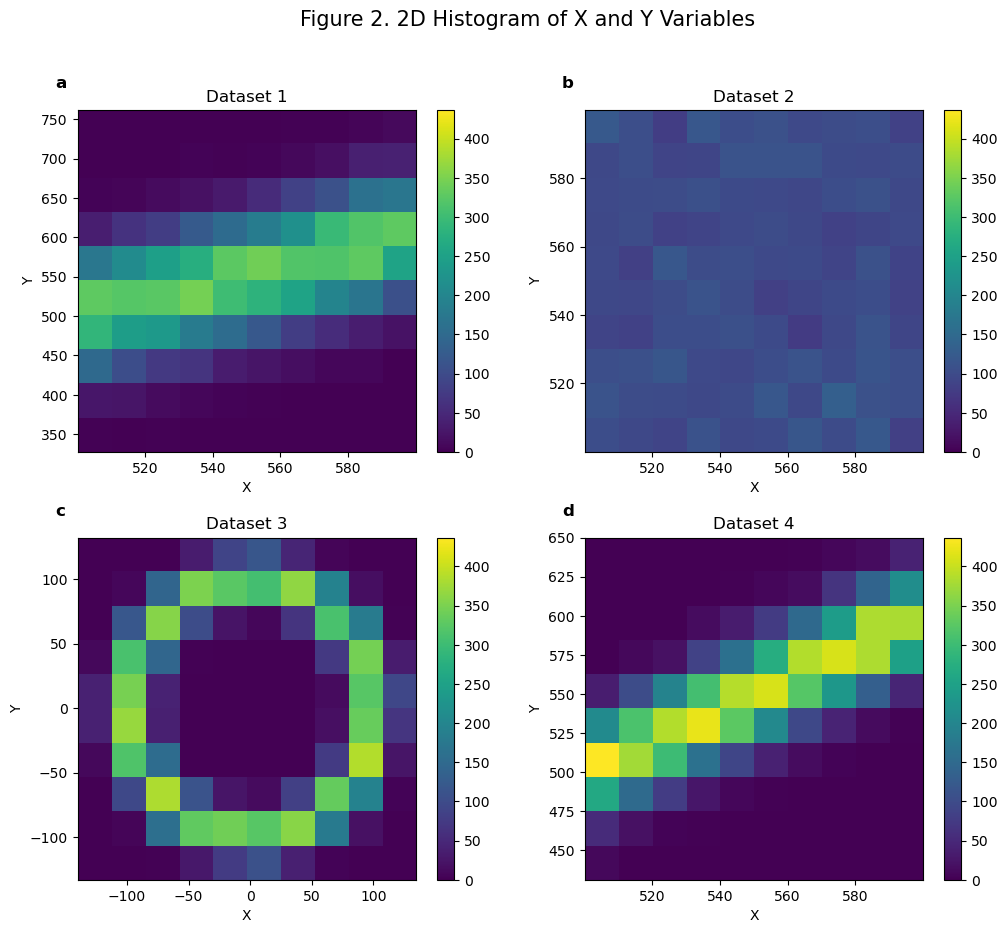

In [13]:
plt.figure()
# generate subplots
fig, axs = plt.subplots(2,2,figsize=(12,10))
# set up super title
fig.suptitle('Figure 2. 2D Histogram of X and Y Variables', fontsize='15')
# a list to store the historgram values
hists = [np.histogram2d(Xs[i],Ys[i],bins=10)[0] for i in range(4)]
xedges = [np.histogram2d(Xs[i],Ys[i],bins=10)[1] for i in range(4)]
yedges = [np.histogram2d(Xs[i],Ys[i],bins=10)[2] for i in range(4)]

# get the minimum and maximum value of the histogram to make identical range for all subplots
min_val = min([hist.min() for hist in hists])
max_val = max([hist.max() for hist in hists])

#??plt.imshow
# plot the datasets
for i,subfig in zip(range(4),axs.ravel()):
        # 2D histograms
        rota_nxy=np.rot90(hists[i])
        im=subfig.imshow(rota_nxy, aspect='auto' ,cmap='viridis',vmin=min_val,vmax=max_val,
                               extent = [xedges[i][0], xedges[i][-1], yedges[i][0], yedges[i][-1]])
        # labels and titles
        subfig.set(title=f'Dataset {i+1}',xlabel='X',ylabel='Y')
        # color bar for each 2D histogram
        fig.colorbar(im, ax=subfig)
        # give serial numbers to subplots
        subfig.text(-0.05,1.1,string.ascii_lowercase[i],transform=subfig.transAxes,fontweight='bold',
                    horizontalalignment='center', verticalalignment='top', fontsize='12')

#adjust the distance between subplots
plt.subplots_adjust(hspace=0.25)    
plt.show()

Fig.2 Two dimensional histogram of four datasets(2a-2d). Horizontal axis represents values of variable X, while vertical axis represents values of variable Y. The color bar indicates grids in bright yellow have highest density, while grids in dark purple have lowest density.

### Question 3.3: 
Write a function to calculate the mutual information between two random variables X and Y normalized by the entropy of Y. <br>
You will need to calculate  H( X ) ,  H( Y )  and  H( Y | X ) . To do so you will need to estimate  P( X , Y ) , and then find  P( X )  and  P( Y ) .

In [14]:
# a function for calculating mutual information of two variables
def mutual(x,y,n=10,m=10):
    # fast fail
    if len(x)!=len(y):
        print('error! two variables are not the same length!')
        sys.exit(1);
        
    # generate histogram value
    nxy, xedges, yedges= np.histogram2d(x, y, (n,m))
    # normalize the data so that the sum of probability = 1
    total=np.sum(nxy)
    nor_Pxy=nxy/total # each point represents P(xi,yj)
    # calculate P(X=xi)
    Px=np.sum(nor_Pxy,axis=1)
    Py=np.sum(nor_Pxy,axis=0)
    
    # calculate entropy of x and y by calling H() function from Q2.1
    hx=H(Px)
    hy=H(Py)
    print('Entropy of X: H(X)={:.5f}'.format(hx))
    print('Entropy of Y: H(Y)={:.5f}'.format(hy))
    
    # calculate conditional entropy
    condi_entro=0
    for i in range(n):
        for j in range(m):
            if nor_Pxy[i][j] > 0:
                condi_entro+=nor_Pxy[i][j]*np.log2(Px[i]/nor_Pxy[i][j])
    print('Conditional entropy: H(Y|X)={:.5f}'.format(condi_entro))
    
    # calculate correlation coefficient by calling correla() function from Q3.1
    corr=correla(x,y)
    
    # calculate the normalized mutual information
    nor_mu_inf=(hy-condi_entro)/hy
    print('Normalized mutual information is {:.5f}'.format(nor_mu_inf))
    
    # generate class object to store data
    Class_XY=Dependence_XY(x,y,hx,hy,condi_entro,corr,nor_mu_inf)
    return Class_XY

# make a class to store all the calculations of dependence of X and Y variables
class Dependence_XY:
    def __init__(self, X,Y, HX, HY, H_YgivenX,correlation,mutual):
        self.X, self.Y, self.HX, self.HY = X,Y,HX,HY
        self.H_YgivenX, self.correlation, self.mutual = H_YgivenX,correlation,mutual

# run the function and store the data
Depen_list=[]
for i in range(4):
    print(f'\nDataset {i+1}:')
    Depen_list.append(mutual(Xs[i],Ys[i]))


Dataset 1:
Entropy of X: H(X)=3.32114
Entropy of Y: H(Y)=2.48988
Conditional entropy: H(Y|X)=2.27743
Correlation coefficient is 0.51593
Normalized mutual information is 0.08532

Dataset 2:
Entropy of X: H(X)=3.32114
Entropy of Y: H(Y)=3.32081
Conditional entropy: H(Y|X)=3.31551
Correlation coefficient is -0.01220
Normalized mutual information is 0.00160

Dataset 3:
Entropy of X: H(X)=3.08696
Entropy of Y: H(Y)=3.14574
Conditional entropy: H(Y|X)=2.36495
Correlation coefficient is -0.00012
Normalized mutual information is 0.24820

Dataset 4:
Entropy of X: H(X)=3.32114
Entropy of Y: H(Y)=2.72337
Conditional entropy: H(Y|X)=1.99818
Correlation coefficient is 0.81708
Normalized mutual information is 0.26628


### Question 3.4: 
Plot each dataset as a scatterplot and title the figure with both the value of the correlation coefficient and the value of the normalized mutual information. Considering all datasets, explain why both measures of dependence change with each dataset in the way you observe. [7]

<Figure size 640x480 with 0 Axes>

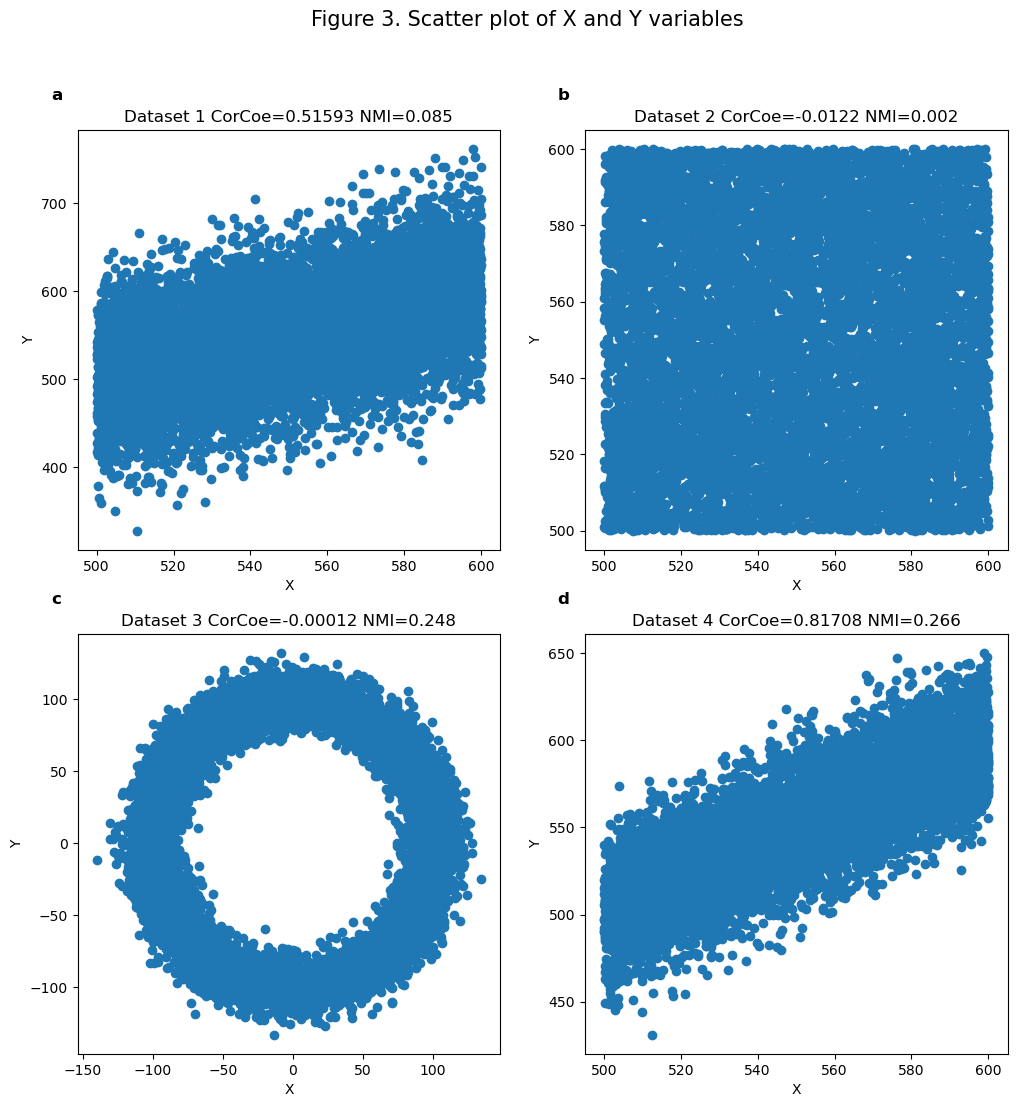

In [19]:
# scatter plots of 4 datasets
plt.figure()
fig, axs = plt.subplots(2,2,figsize=(12,12))
fig.suptitle('Figure 3. Scatter plot of X and Y variables',fontsize='15')
j=0
# axs.ravel() to flatten axs to a simple list
for i,subfig in zip(range(4),axs.ravel()):
    subfig.scatter(Depen_list[i].X,Depen_list[i].Y)
    # set titles and axises labels
    subt=f'Dataset {i+1} CorCoe={round(Depen_list[i].correlation,5)} NMI={round(Depen_list[i].mutual,3)}'
    subfig.set(title=subt, xlabel='X',ylabel='Y')
    # give serial numbers to subplots
    subfig.text(-0.05, 1.1, string.ascii_lowercase[i], transform=subfig.transAxes, fontweight='bold',
                horizontalalignment='center', verticalalignment='top', fontsize='12')
#adjust the distance between subplots
plt.subplots_adjust(hspace=0.2) 
plt.show()

Fig.3 Scatter plot of four datasets(3a-3d). X axis values of variable X, and Y axis represents values of variable Y. Correlation coefficient(CorCoe) and normalized mutual information(NMI) of each dataset is shown in title of each subplot.

#### Answer:
The correlation coefficient(CorCoe) indicates the linear relationship of two variables. The CorCoe range from -1 to 1, if it's very close to 0, it means that variable X and variable Y are not linear related, or to say, the slope(k) in **Y = k * X + C** is close to horizontal. <br>
From the CorCoe results, we can tell that dataset 4(CorCoe=0.82) shows highest linear relationship between X and Y, and dataset 1(CorCoe=0.52) comes the second. The distributions of both datasets also show linear relationship between X and Y(fig.3a, fig3d), but the distribution of dataset 1 is more scattered than that of dataset 4. Because of this, the dataset 1 has a larger distance between variables and their means, same as saying the variance is bigger, making the dominator of the formular of CorCoe larger, so the result of CorCoe of dataset 1 becomes smaller. <br>
In addition, dataset 2 and 3 both show weak linear relationship between X and Y variables, with CorCoe value close to zero (0.01 and 0 respectively). The scatter plots also shows consistent result, with the dataset 2 uniformly scattered(fig.3b) and dataset 3 (fig.3c) forming a shape of circle instead of line. Neither of them shows linear relationship.<br><br>

The normalized mutual information(NMI) tells the similarity of two variables, not limited to only the linear relationship. The datasets with higher NMI indicates a higher correlation between X and Y.<br>
Dataset 3 and 4 have high NMI values(0.25 and 0.27 respectively), and scatter plots of them also show that variables X and Y are related. The dataset 4 has higher NMI mainly because X and Y are linear related(fig.3d), which means each value in X only maps to one expected value in Y, whereas in dataset 3(fig.3c), some values in X can be mapped to two values in Y, for example, X=0 can map to Y=100 or Y=-100, making radomization of Y given X larger and lower NMI. <br>
Dataset 1 has second lowest NMI value(0.085), because the values in Y are more scattered given by X, which makes the H(Y|X) high, so the NMI value is lower than dataset 4.<br>
Dataset 2 scatter plots(fig.3b) shows uniform distribution between X and Y, non correlations are shown, so the NMI value closes to zero(0.002).<br><br>
To sum up, the results of correlation coefficient and normalized mutual information are consistent in datasets 1,2 and 4. The inconsistency in dataset 3 is because the correlation coefficient can't shows the non-linear relationship between two variables, while normalized mutual information can.